In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

print("Libraries imported successfully ✅")


Libraries imported successfully ✅


In [3]:
# Cell 2: Load dataset
df = pd.read_csv("../data/train.csv", parse_dates=['Date'])
df.head()
store = pd.read_csv("../data/store.csv")
store.head()
store_ids = [3, 4]
df_filtered = df[df['Store'].isin(store_ids)]
df_filtered.head()
df_filtered.groupby("Store")['Sales'].describe()



,count,mean,std,min,25%,50%,75%,max
Store,,,,,,,,
3,942.0,5741.253715,3298.782559,0.0,4247.5,5892.0,8152.75,15689.0
4,942.0,8021.769639,4012.592818,0.0,7322.5,9062.0,10281.00,17412.0


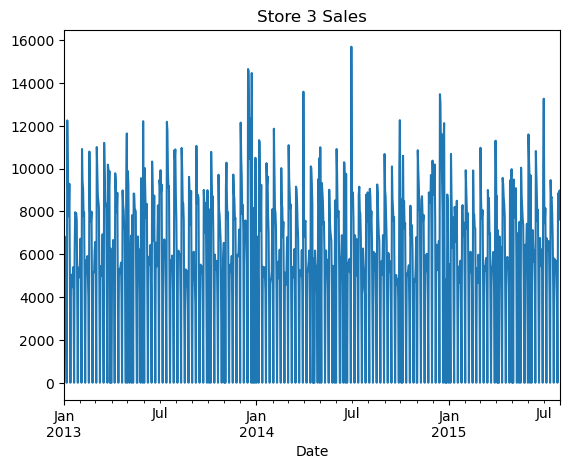

In [4]:
# Cell 3: Prepare data
df_filtered = df_filtered.sort_values(['Store', 'Date'])
df_filtered.set_index('Date', inplace=True)

# Check data for one store
df_filtered[df_filtered['Store'] == 3]['Sales'].plot(title='Store 3 Sales')
plt.show()


In [5]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Cell 4: Fit SARIMAX for each store
store_ids = [3, 4]
results = {}

for store_id in store_ids:
    print(f"\nTraining SARIMAX model for Store {store_id}...")
    store_data = df_filtered[df_filtered['Store'] == store_id]['Sales']
    
    model = SARIMAX(store_data,
                    order=(1,1,1),          # ARIMA parameters (p,d,q)
                    seasonal_order=(1,1,1,7), # Weekly seasonality
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    
    result = model.fit(disp=False)
    results[store_id] = result
    print(f"Model for Store {store_id} trained successfully ✅")



Training SARIMAX model for Store 3...
Model for Store 3 trained successfully ✅

Training SARIMAX model for Store 4...
Model for Store 4 trained successfully ✅



Forecasting Store 3...


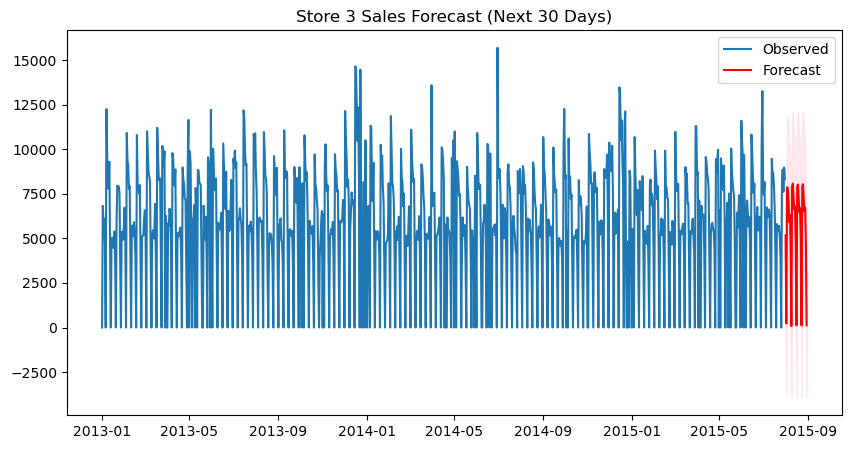


Forecasting Store 4...


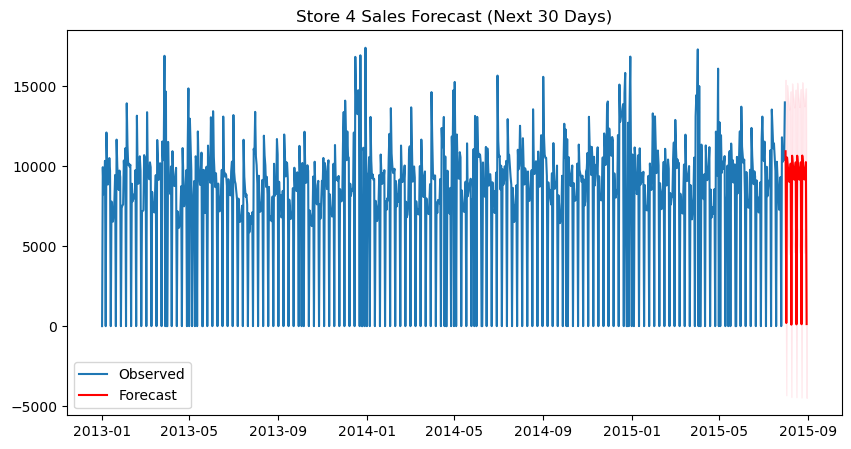

In [6]:
# Cell 5: Forecast next 30 days for each store
forecast_horizon = 30

for store_id, result in results.items():
    print(f"\nForecasting Store {store_id}...")
    forecast = result.get_forecast(steps=forecast_horizon)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    plt.figure(figsize=(10,5))
    plt.plot(df_filtered[df_filtered['Store'] == store_id]['Sales'], label='Observed')
    plt.plot(forecast_mean.index, forecast_mean, label='Forecast', color='red')
    plt.fill_between(forecast_ci.index,
                     forecast_ci.iloc[:, 0],
                     forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
    plt.title(f"Store {store_id} Sales Forecast (Next 30 Days)")
    plt.legend()
    plt.show()


In [8]:
# Cell 6: Export forecasts to CSV

import pandas as pd

forecast_horizon = 30
all_forecasts = []

for store_id, result in results.items():
    forecast = result.get_forecast(steps=forecast_horizon)
    forecast_mean = forecast.predicted_mean
    forecast_ci = forecast.conf_int()

    temp_df = pd.DataFrame({
        'Store': store_id,
        'Date': forecast_mean.index,
        'Forecast_Sales': forecast_mean.values,
        'Lower_CI': forecast_ci.iloc[:, 0].values,
        'Upper_CI': forecast_ci.iloc[:, 1].values
    })
    
    all_forecasts.append(temp_df)

# ✅ Combine all store forecasts
final_forecast_df = pd.concat(all_forecasts)

# ✅ Save to CSV inside the 'data' folder
final_forecast_df.to_csv("../data/forecast_stores_3_4.csv", index=False)

print("✅ Forecasts saved to '../data/forecast_stores_3_4.csv'")
final_forecast_df.head()


✅ Forecasts saved to '../data/forecast_stores_3_4.csv'


,Store,Date,Forecast_Sales,Lower_CI,Upper_CI
0,3,2015-08-01,5166.825252,1400.784103,8932.866400
1,3,2015-08-02,229.087412,-3712.021681,4170.196506
2,3,2015-08-03,7863.608543,3903.005046,11824.212039
3,3,2015-08-04,7835.608334,3871.554373,11799.662296
4,3,2015-08-05,7191.366640,3226.094302,11156.638978


In [9]:
import os

os.listdir("../data")


['.ipynb_checkpoints',
 'forecast_stores_3_4.csv',
 'sample_submission.csv',
 'store.csv',
 'test.csv',
 'train.csv']

In [10]:
import pandas as pd

df = pd.read_csv("../data/forecast_stores_3_4.csv")
df.head()


,Store,Date,Forecast_Sales,Lower_CI,Upper_CI
0,3,2015-08-01,5166.825252,1400.784103,8932.866400
1,3,2015-08-02,229.087412,-3712.021681,4170.196506
2,3,2015-08-03,7863.608543,3903.005046,11824.212039
3,3,2015-08-04,7835.608334,3871.554373,11799.662296
4,3,2015-08-05,7191.366640,3226.094302,11156.638978
